## Using Deep Learning to Examine the Association of the Built Environment With Prevalence of Neigborhood Mental Health Issues

### Dataset used: Model-based estimates for mental health not good for >=14 days among adults aged >=18 years – 2016

Importing necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

ModuleNotFoundError: No module named 'seaborn'

### Exploratory Data Analysis

In [6]:
# Load csv file
df = pd.read_csv("./data/500_Cities__Mental_health_not_good_for___14_days_among_adults_aged___18_years.csv")

# Show size
df.shape

(29006, 24)

> Add Commentary

In [3]:
# Dropping unneccessary columns
df = df.drop([
       "DataSource", "Category", "Measure", "Data_Value_Unit",
       "Data_Value_Type", "Data_Value_Footnote_Symbol", "Data_Value_Footnote",
       "CategoryID", "MeasureId", 
       "Short_Question_Text"], axis=1)

# This is what we have now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29006 entries, 0 to 29005
Data columns (total 14 columns):
Year                     29006 non-null int64
StateAbbr                29006 non-null object
StateDesc                29006 non-null object
CityName                 29004 non-null object
GeographicLevel          29006 non-null object
UniqueID                 29006 non-null object
DataValueTypeID          29006 non-null object
Data_Value               28212 non-null float64
Low_Confidence_Limit     28212 non-null float64
High_Confidence_Limit    28212 non-null float64
PopulationCount          29006 non-null object
GeoLocation              29004 non-null object
CityFIPS                 29004 non-null float64
TractFIPS                28004 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 3.1+ MB


In [4]:
# Dropping duplicates
df = df.drop_duplicates()

# Finding missing values
n_records = len(df)
def missing_values_df(df):
    for col in df:
        print("{} | {} | {}".format(
            col, len(df[df[col].isnull()]) / (1.0*n_records), df[col].dtype
        ))
missing_values_df(df)

# Dropping missing values (can impute or replace with 0)
orig_size = df.shape[0]
df = df.dropna()
curr_size = df.shape[0]
print("\nDropped {} data points".format(orig_size - curr_size))

Year | 0.0 | int64
StateAbbr | 0.0 | object
StateDesc | 0.0 | object
CityName | 6.895125146521409e-05 | object
GeographicLevel | 0.0 | object
UniqueID | 0.0 | object
DataValueTypeID | 0.0 | object
Data_Value | 0.027373646831689996 | float64
Low_Confidence_Limit | 0.027373646831689996 | float64
High_Confidence_Limit | 0.027373646831689996 | float64
PopulationCount | 0.0 | object
GeoLocation | 6.895125146521409e-05 | object
CityFIPS | 6.895125146521409e-05 | float64
TractFIPS | 0.03454457698407226 | float64

Dropped 1796 data points


> Add Commentary

In [5]:
# A quick look at the desciptive statistics of the dataset
df.describe()

,Year,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,CityFIPS,TractFIPS
count,27210.0,27210.000000,27210.000000,27210.000000,2.721000e+04,2.721000e+04
mean,2016.0,13.110595,11.836549,14.469688,2.605539e+06,2.586284e+10
std,0.0,3.410292,3.166492,3.650666,1.681206e+06,1.671749e+10
min,2016.0,4.100000,3.100000,5.700000,1.500300e+04,1.073000e+09
25%,2016.0,10.500000,9.400000,11.700000,6.815540e+05,8.001009e+09
50%,2016.0,12.700000,11.400000,14.000000,2.622000e+06,2.607700e+10
75%,2016.0,15.400000,14.000000,16.900000,4.052500e+06,4.010910e+10
max,2016.0,29.400000,26.600000,32.600000,5.613900e+06,5.602100e+10


> Add Commentary

Now, we will visualize how the percentage of survey takers with mental health is distributed across the country.

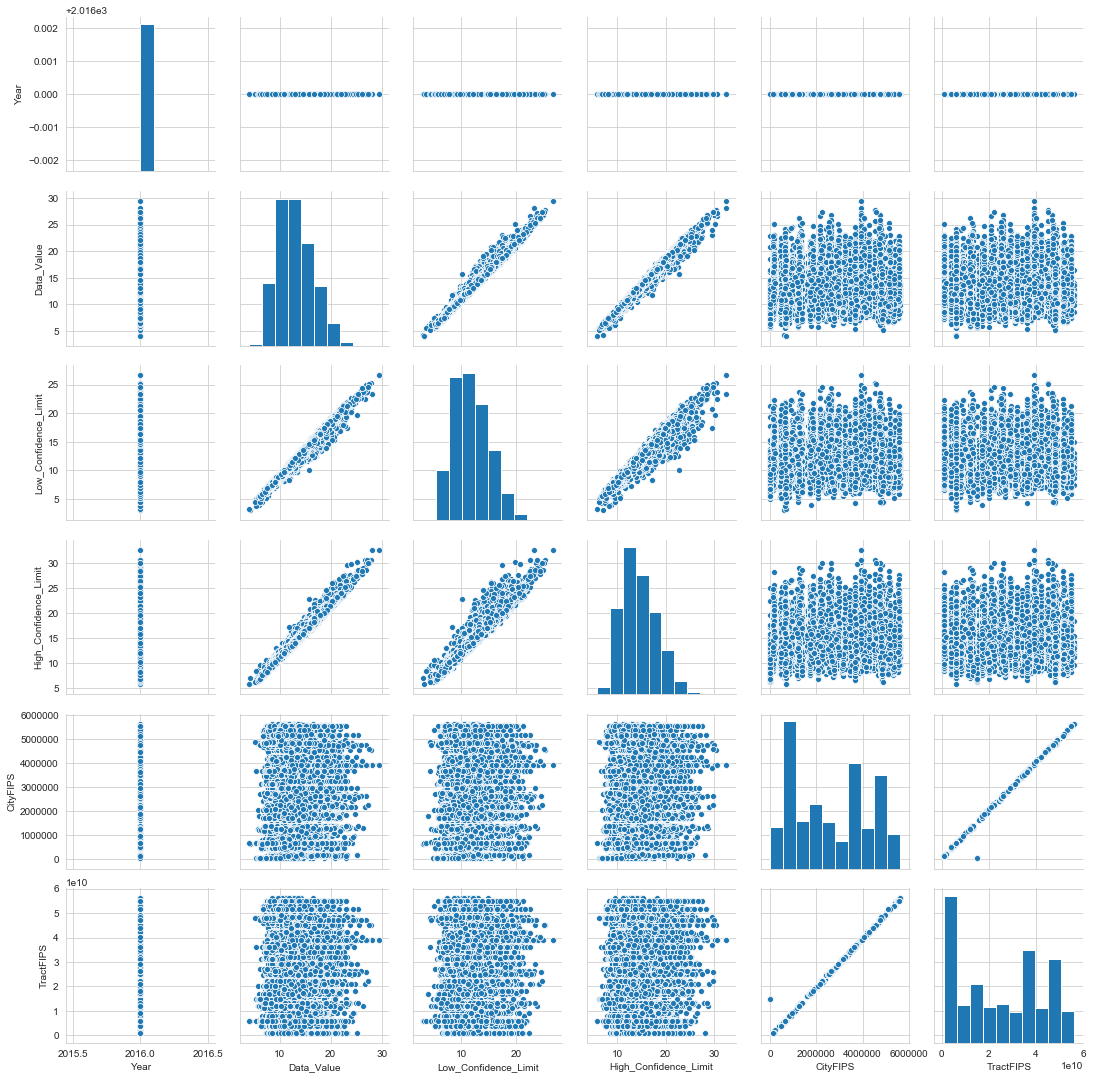

In [6]:
sns.pairplot(df)

Show top 10 cities with highest prevalence of mental health issues (crude prevalence)

In [7]:
df.groupby('CityName')['Data_Value'].mean().nlargest(10)

CityName
Flint          18.702564
Camden         18.568421
New Bedford    18.567742
Reading        18.322222
Detroit        18.190753
Fall River     18.132000
Trenton        17.188000
Dayton         17.105263
Cleveland      16.917143
Fort Smith     16.842857
Name: Data_Value, dtype: float64

Show top 10 cities with lowest prevalence of mental health issues (crude prevalence)

In [8]:
df.groupby('CityName')['Data_Value'].mean().nsmallest(10)

CityName
Plymouth         7.973333
Sunnyvale        8.031034
San Ramon        8.280000
Bellevue         8.317857
Overland Park    8.360417
Fremont          8.432558
Sugar Land       8.483333
Mountain View    8.505000
Newport Beach    8.523810
Naperville       8.566667
Name: Data_Value, dtype: float64

In [9]:
df.groupby('CityName')['Data_Value'].count()

CityName
Abilene               37
Akron                 66
Alameda               16
Albany                51
Albuquerque          137
Alexandria            38
Alhambra              20
Allen                 11
Allentown             26
Amarillo              55
Anaheim               75
Anchorage             55
Ann Arbor             33
Antioch               20
Apple Valley          12
Appleton              24
Arlington             73
Arlington Heights     22
Arvada                33
Asheville             29
Athens                30
Atlanta              130
Auburn                19
Augusta               47
Aurora               127
Austin               198
Avondale              21
Bakersfield           79
Baldwin Park          18
Baltimore            199
                    ... 
Victorville           19
Virginia Beach        99
Visalia               21
Vista                 26
Waco                  35
Warner Robins         19
Warren                42
Warwick               21
Washington      

### Formatting tractID for downloading images

In [10]:
df.TractFIPS = df.TractFIPS.astype('str').apply(lambda s: s[:s.index('.')])
df.TractFIPS = df.TractFIPS.apply(lambda x: x.zfill(11))

In [15]:
temp_df = df[df['CityName']=='Bellevue']
temp_df.describe()

,Year,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,CityFIPS
count,28.0,28.000000,28.000000,28.000000,28.0
mean,2016.0,8.317857,7.478571,9.260714,5305210.0
std,0.0,0.932958,0.859956,0.963150,0.0
min,2016.0,6.700000,6.100000,7.600000,5305210.0
25%,2016.0,7.650000,6.875000,8.575000,5305210.0
50%,2016.0,8.250000,7.350000,9.250000,5305210.0
75%,2016.0,8.500000,7.725000,9.550000,5305210.0
max,2016.0,10.500000,9.500000,11.600000,5305210.0


### Create function to export data per city

In [134]:
def exportCityDf(city):
    temp_df = df[df['CityName']==city]
    temp_df.to_csv(('./data/{}/500_cities_{}_mental_health.csv').format(city, city))

In [135]:
la_df = df[df['CityName'] == 'Los Angeles']
la_df.to_csv('./data/lacity/500_cities_lacity_mental_health.csv')

In [136]:
# Repeat for memphis, san antonio
exportCityDf('Memphis')
exportCityDf('San Antonio')
exportCityDf('Bellevue')

## Visualization of Los Angeles

In [89]:
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

In [90]:
crs={'init': 'epsg:4326'}
la_gdf = gpd.read_file('./data/lacity/lacity_census_tracts_2010.shp').to_crs(crs)
la_gdf.head()

,place2010,tract2010,ST,PlaceName,plctract10,PlcTrPop10,geometry
0,0644000,06037101110,06,Los Angeles,0644000-06037101110,4731,"POLYGON ((-118.297931213639 34.26322687656024,..."
1,0644000,06037101122,06,Los Angeles,0644000-06037101122,3664,POLYGON ((-118.2774342100708 34.25990787750879...
2,0644000,06037101210,06,Los Angeles,0644000-06037101210,5990,POLYGON ((-118.2859362108728 34.25589987687358...
3,0644000,06037101220,06,Los Angeles,0644000-06037101220,3363,POLYGON ((-118.2781792098854 34.25577287675071...
4,0644000,06037101300,06,Los Angeles,0644000-06037101300,4199,"POLYGON ((-118.265276207098 34.25238487777043,..."


Text(0.5, 1.0, 'Los Angeles City Census Tract')

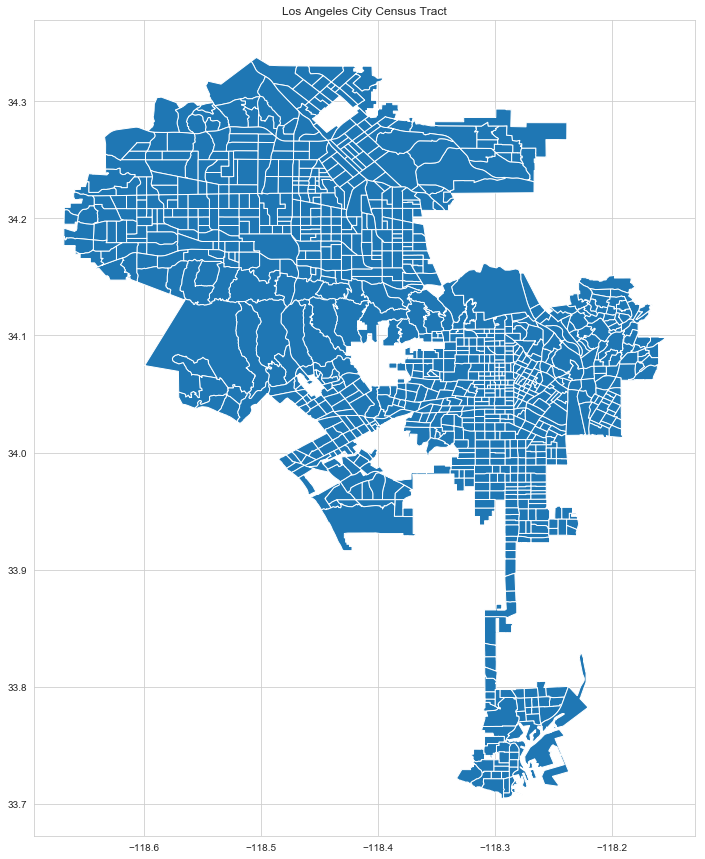

In [91]:
fig, ax = plt.subplots(figsize=(15,15))
la_gdf.plot(ax=ax)
plt.title('Los Angeles City Census Tract')

### Modifying LA census tract to plot on Shapefile

In [92]:
# Change geolocation to latitude longitude
def convertToLat(row):
    tempRow = eval(row)
    return (tempRow[0]) 

def convertToLong(row):
    tempRow = eval(row)
    return (tempRow[1]) 

la_df['Latitude'] = la_df['GeoLocation'].apply(lambda row: convertToLat(row))
la_df['Longitude'] = la_df['GeoLocation'].apply(lambda row: convertToLong(row))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [93]:
geometry = [Point(xy) for xy in zip(la_df['Longitude'],la_df['Latitude'])]
geometry[:3]

In [94]:
geo_la_df = gpd.GeoDataFrame(la_df, geometry=geometry, crs=crs)
geo_la_df.head(3)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,UniqueID,DataValueTypeID,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,GeoLocation,CityFIPS,TractFIPS,Latitude,Longitude,geometry
42,2016,CA,California,Los Angeles,Census Tract,0644000-06037234200,CrdPrv,10.6,9.7,11.6,"2,376","(34.0164074473, -118.331152283)",644000.0,06037234200,34.016407,-118.331152,POINT (-118.331152283 34.0164074473)
65,2016,CA,California,Los Angeles,Census Tract,0644000-06037117101,CrdPrv,10.9,9.7,12.0,"4,796","(34.2392075129, -118.462188995)",644000.0,06037117101,34.239208,-118.462189,POINT (-118.462188995 34.2392075129)
84,2016,CA,California,Los Angeles,Census Tract,0644000-06037203720,CrdPrv,19.3,17.0,21.2,"4,001","(34.0468935209, -118.203150133)",644000.0,06037203720,34.046894,-118.203150,POINT (-118.203150133 34.0468935209)


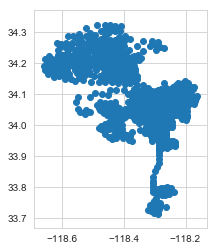

In [95]:
geo_la_df.plot()

In [96]:
vmax = geo_la_df.Data_Value.max()
vmin = geo_la_df.Data_Value.min()

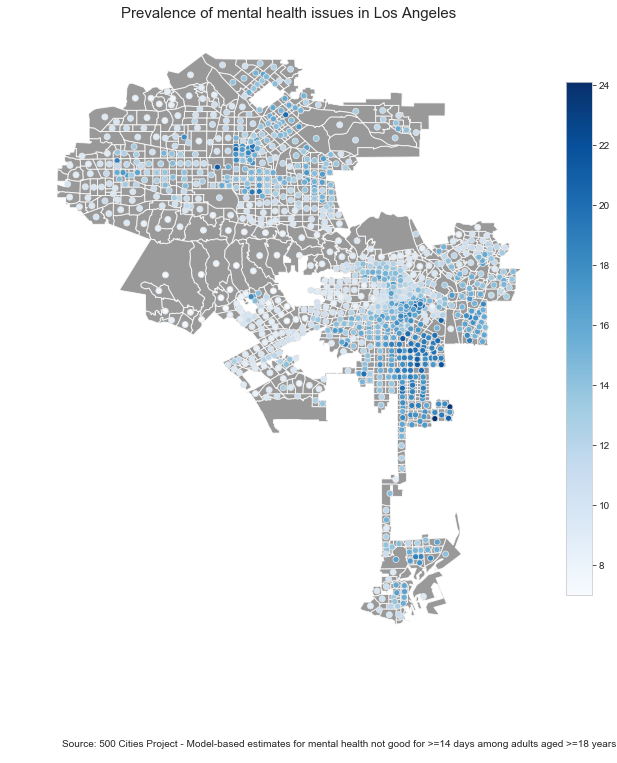

In [97]:
# create map
fig, ax = plt.subplots(figsize=(10,12))
la_gdf.to_crs(crs).plot(ax=ax, color='grey', alpha=0.8)
geo_la_df.to_crs(crs).plot(column="Data_Value", cmap="Blues",ax=ax, linewidth=0.8, edgecolor='0.9')

# customize
ax.set_title('Prevalence of mental health issues in Los Angeles',fontdict={"fontsize": "15", "fontweight" : "3"})
ax.annotate('Source: 500 Cities Project - Model-based estimates for mental health not good for >=14 days among adults aged >=18 years – 2016', xy=(0.1,0.03), xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize="10")

# set colorbar
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, fraction=0.046,pad=0.04)

# remove axis
ax.axis('off')
plt.savefig('lacity_vis.png')

## Visualization of Memphis

In [98]:
def createVis(shapePath, dataPath, cityName, outPath):
    # Read in files
    crs={'init': 'epsg:4326'}
    mem_gdf = gpd.read_file(shapePath).to_crs(crs)
    mem_df = pd.DataFrame.from_csv(dataPath)
    
    # Create Points
    mem_df['Latitude'] = mem_df['GeoLocation'].apply(lambda row: convertToLat(row))
    mem_df['Longitude'] = mem_df['GeoLocation'].apply(lambda row: convertToLong(row))
    geometry_mem = [Point(xy) for xy in zip(mem_df['Longitude'],mem_df['Latitude'])]
    
    # Prepare df for plot
    geo_mem_df = gpd.GeoDataFrame(mem_df, geometry=geometry_mem, crs=crs)
    vmax_mem = geo_mem_df.Data_Value.max()
    vmin_mem = geo_mem_df.Data_Value.min()
    # Plot gis data

    # create map
    fig, ax = plt.subplots(figsize=(10,12))
    mem_gdf.plot(ax=ax, color='grey', alpha=0.8)
    geo_mem_df.to_crs(crs).plot(column="Data_Value", cmap="Blues",ax=ax, linewidth=0.8, edgecolor='0.9')

    # customize
    ax.set_title(('Prevalence of mental health issues in {}').format(cityName),fontdict={"fontsize": "15", "fontweight" : "3"})
    ax.annotate('Source: 500 Cities Project - Model-based estimates for mental health not good for >=14 days among adults aged >=18 years – 2016', xy=(0.1,0.03), xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize="10")

    # set colorbar
    sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm, fraction=0.046,pad=0.04)

    # remove axis
    ax.axis('off')
    plt.savefig(outPath)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """


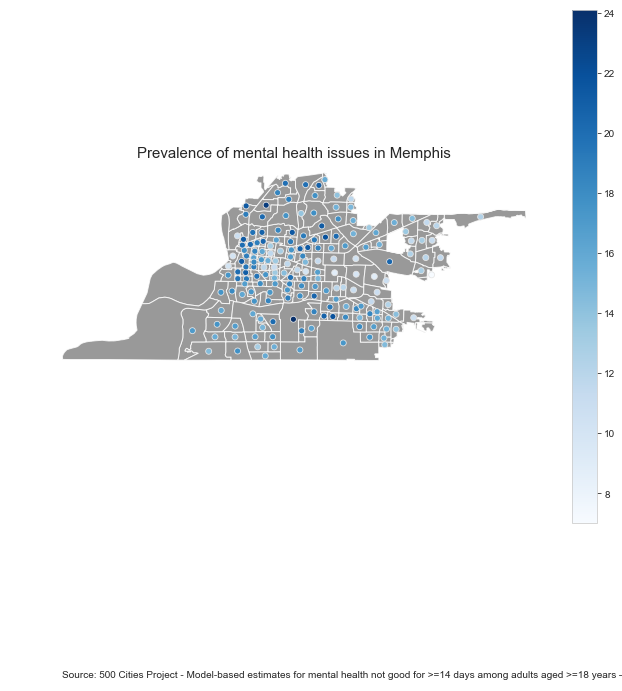

In [99]:
createVis('./data/Memphis/memphis_census_tracts_2010.shp', './data/Memphis/500_cities_Memphis_mental_health.csv', 'Memphis', 'mem_vis.png')

## Visualization of San Antonio

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """


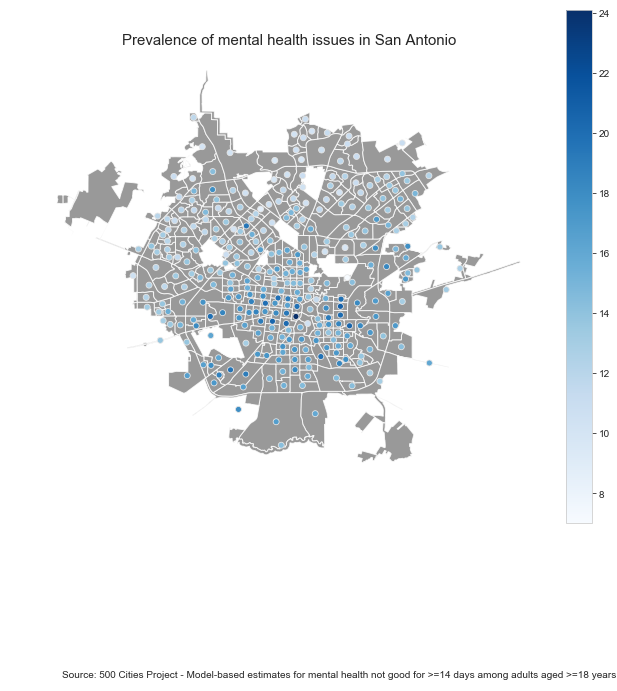

In [100]:
createVis('./data/San Antonio/san-antonio_census_tracts_2010.shp', './data/San Antonio/500_cities_San Antonio_mental_health.csv', 'San Antonio', 'sa_vis.png')

## Visualization of Bellevue

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """


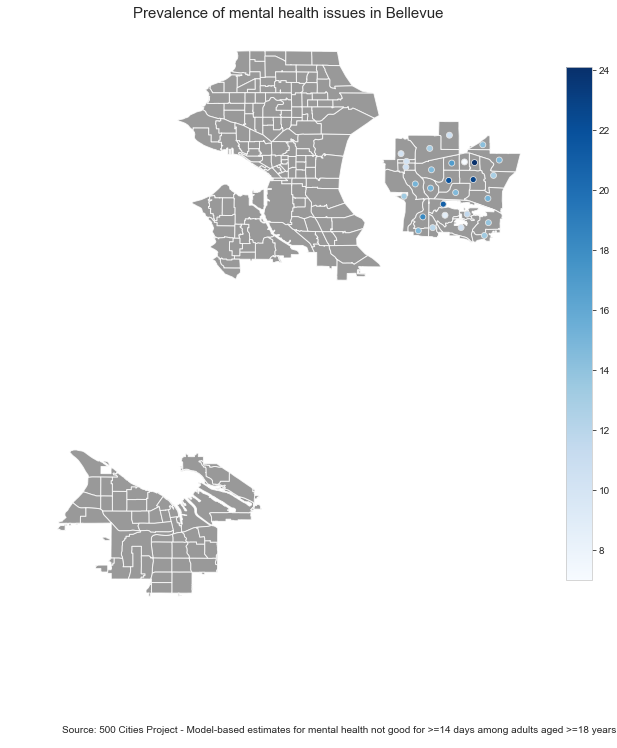

In [101]:
createVis('./data/Bellevue/stb_census_tracts_2010.shp', './data/Bellevue/500_cities_Bellevue_mental_health.csv', 'Bellevue', 'bel_vis.png')